In [3]:
import tslearn
import numpy as np
from tslearn.datasets import UCR_UEA_datasets
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("Wafer")

In [4]:
y0 = np.cumsum(X_train[0])
y0_lag = [val for val in y0 for i in range(2)]
y0_lag.pop()
y0_lead = [val for val in y0 for i in range(2)]
y0_lead.pop(0)
y_train

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,
       -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [5]:
SX_list = []
for i in range(len(X_train)):
    y0 = np.cumsum(X_train[i])
    y0_lag = [val for val in y0 for i in range(2)]
    y0_lag.pop()
    y0_lead = [val for val in y0 for i in range(2)]
    y0_lead.pop(0)
    X0 = np.zeros((2,len(y0_lag)))
    X0[0] = y0_lag
    X0[1] = y0_lead
    X0 = np.transpose(X0)
    # print(X0)
    import iisignature as sig
    SX = sig.sig(X0,2)
    SX_list.append(SX)


In [6]:
SX_list_test = []
for i in range(len(X_test)):
    y0 = np.cumsum(X_test[i])
    y0_lag = [val for val in y0 for i in range(2)]
    y0_lag.pop()
    y0_lead = [val for val in y0 for i in range(2)]
    y0_lead.pop(0)
    X0 = np.zeros((2,len(y0_lag)))
    X0[0] = y0_lag
    X0[1] = y0_lead
    X0 = np.transpose(X0)
    # print(X0)
    import iisignature as sig
    SX = sig.sig(X0,2)
    SX_list_test.append(SX)
    

6164


C:\Users\huawei\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


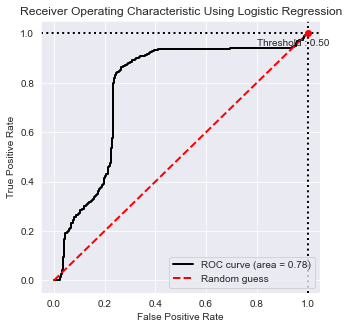

score is 0.8921155094094744


In [164]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="sag")
clf.fit(SX_list, y_train)
y_pred = clf.predict_proba(SX_list_test)[:,1]
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric

bc = BinaryClassification(y_test, y_pred, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using Logistic Regression")
plt.show()
score = clf.score(SX_list_test, y_test)
print("score is " + str(score))

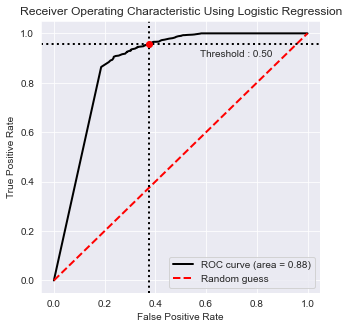

score is 0.9203439325113563


In [165]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(SX_list, y_train)
y_pred = clf.predict_proba(SX_list_test)[:,1]
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric

bc = BinaryClassification(y_test, y_pred, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using Logistic Regression")
plt.show()
score = clf.score(SX_list_test, y_test)
print("score is " + str(score))

[-1.6022936, -1.6022936, -1.6708228, -1.6708228, -1.6936659, -1.6936659, -1.6993767, -1.6993767, -1.6993767, -1.6993767]
[-1.6022936, -1.6708228, -1.6708228, -1.6936659, -1.6936659, -1.6993767, -1.6993767, -1.6993767, -1.6993767, -1.7036597]


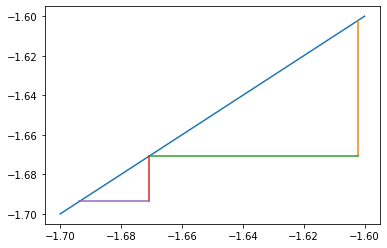

In [48]:
y = X_train[0]
y_lag = [val[0] for val in y for i in range(2)]
y_lag.pop()
y_lead = [val[0] for val in y for i in range(2)]
y_lead.pop(0)
# print(y)
print(y_lag[0:10])
print(y_lead[0:10])
import matplotlib.pyplot as plt
x = np.linspace(-1.7,-1.6,100)
plt.plot(x,x)
plt.plot(y_lag[0:2],y_lead[0:2])
plt.plot(y_lag[1:3],y_lead[1:3])
plt.plot(y_lag[2:4],y_lead[2:4])
plt.plot(y_lag[3:5],y_lead[3:5])

In [1]:
from tslearn.svm import TimeSeriesSVC
clf = TimeSeriesSVC(C=1.0, kernel="gak")
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

NameError: name 'X_train' is not defined